## ssim data  
this notebook explores the data and makes sure everything looks correct.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from PIL import Image as im
%matplotlib inline
plt.rcParams['font.size'] = 20

first lets look at the pictures and makes sure they are looking right.

In [2]:
# take a peek at the pics
orig_500 = pd.read_csv('https://raw.githubusercontent.com/michaelneuder/image_quality_analysis/master/data/sample_data/orig_500.txt', header=None, delim_whitespace = True)
recon_500 = pd.read_csv('https://raw.githubusercontent.com/michaelneuder/image_quality_analysis/master/data/sample_data/recon_500.txt', header=None, delim_whitespace = True)
orig_140 = pd.read_csv('https://raw.githubusercontent.com/michaelneuder/image_quality_analysis/master/data/sample_data/orig_140.txt', header=None, delim_whitespace = True)
recon_140 = pd.read_csv('https://raw.githubusercontent.com/michaelneuder/image_quality_analysis/master/data/sample_data/recon_140.txt', header=None, delim_whitespace = True)

In [3]:
orig_500.head()

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,0,0,0,0,0,0,0,0,0,0,...,126,111,112,112,119,116,119,116,111,118
1,7,5,4,4,4,3,4,4,4,4,...,31,31,23,38,38,33,35,18,55,64
2,23,23,23,23,23,24,22,10,16,18,...,76,72,72,71,71,77,78,78,76,80
3,137,137,138,138,137,138,138,139,140,140,...,67,66,62,64,65,67,70,71,84,88
4,224,228,230,225,223,227,231,232,231,231,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# reshape
original_images = orig_500.values.reshape(500,96,96)
reconstructed_images = recon_500.values.reshape(500,96,96)

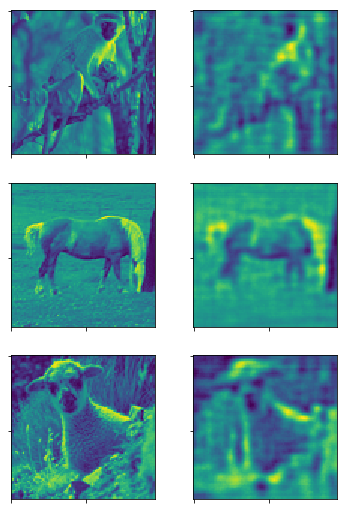

In [5]:
# sample image
f, axarr = plt.subplots(nrows=3,ncols=2, figsize=(6,9))
for i in range(3):
    x = np.random.randint(500)
    axarr[i,0].imshow(original_images[x])
    axarr[i,1].imshow(reconstructed_images[x])
for ax_row in axarr:
    for ax in ax_row:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
plt.show()

this shows the original images on the left and the reconstructed versions on the right. these look right, so we can be sure that the image data is al correct. now we want to get the ssim data that we will train the network on. i used a matlab implementation of the ssim score generators.

note that the ssim data returned from the matlab script reduced the size of the input by not using zero padding. therefore the resulting arrays are 86x86 instead of 96x96. we can verify that the ssim scores looks correct by looking at the images they produce.

In [7]:
ssim_orig = pd.read_csv('/home/dirty_mike/Dropbox/github/image_quality_analysis/data/sample_data/ssim_500_new.csv', header=None)

In [8]:
ssim_dim = 86
ssim_orig = np.reshape(ssim_orig.values, (ssim_orig.shape[0], ssim_dim, ssim_dim))

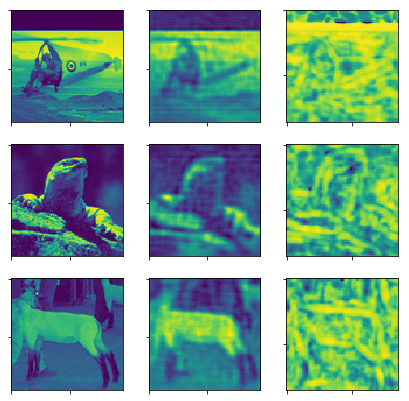

In [14]:
f, axarr = plt.subplots(nrows=3,ncols=3, figsize=(7,7))
fig = [0,1,2]
for i in range(3):
    x = fig[i]
    axarr[i,0].imshow(original_images[x])
    axarr[i,1].imshow(reconstructed_images[x])
    axarr[i,2].imshow(ssim_orig[x])
for ax_row in axarr:
    for ax in ax_row:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
plt.show()        

clearly the ssim data is mapping some of the structure and qualities of the original images. this is what we want and expect. now we can use this data to train a network.